In [1]:
import pandas as pd
import geopandas as gpd
import cbsodata

# Find out which columns are available
metadata = pd.DataFrame(cbsodata.get_meta('83765NED', 'DataProperties'))


Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4Image.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4Image.dll
127: The specified procedure could not be found.



In [2]:
# Download birth rates and delete spaces from regional identifiers
data = pd.DataFrame(cbsodata.get_data('83765NED', select = ['WijkenEnBuurten', 'Codering_3', 'GeboorteRelatief_25']))
data['Codering_3'] = data['Codering_3'].str.strip()


In [3]:
# Retrieve data with municipal boundaries from PDOK
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
municipal_boundaries = gpd.read_file(geodata_url)[['statcode','statnaam','geometry']]
municipal_boundaries['statcode'] = municipal_boundaries['statcode']

ERROR:fiona._env:Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.

ERROR:fiona._env:Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.

ERROR:fiona._env:Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.

ERROR:fiona._env:Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.

ERROR:fiona._env:Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.

ERROR:fiona._env:Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.

ERROR:fiona._env:Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4Image.dll
127: The specified procedure could not be found.

ERROR:fion

In [4]:
# Link data from Statistics Netherlands to geodata
municipal_boundaries = pd.merge(municipal_boundaries, data,
                               left_on = "statcode", 
                               right_on = "Codering_3")

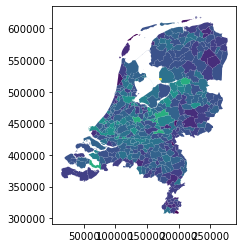

In [5]:
# Create a thematic map
p = municipal_boundaries.plot(column='GeboorteRelatief_25')

In [21]:
import shapely.geometry
import geopandas

polygon_sample = municipal_boundaries['geometry'].apply(lambda x: geopandas.GeoSeries([x]).__geo_interface__).values

In [7]:
# import json
# import requests
# import pandas as pd
# import numpy as np
# import plotly.express as px


# # df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
# #                   dtype={"fips": int})
# polygons = requests.get(
#     "https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/4_kreise/2_hoch.geo.json"
# ).json()

# print(polygons)


# # generate some data for each region defined in geojson...
# df = pd.DataFrame(
#     {"fips": range(1, 390, 1), "unemp": np.random.uniform(0.4, 10.4, 433)}
# )

# fig = px.choropleth(
#     df,
#     geojson=polygons,
#     locations="fips",
#     featureidkey="properties.ID_3",
#     color="unemp",
#     color_continuous_scale="Viridis",
#     range_color=(0, 12),
#     # scope="europe",
#     labels={"unemp": "unemployment rate"},
# )
# fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
# fig.update_geos(fitbounds="locations", visible=True)
# fig.show()

In [23]:
dict({'type':'FeatureCollection','features':polygon_sample})
print('tes')

tes


In [15]:
municipal_boundaries['geometry'].values

<GeometryArray>
 ...
Length: 388, dtype: geometry